# Summarizing metrics from single horizontal lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ss,u = me.importStillsSummary()

In [47]:
vs,uv = plainIm(os.path.join(cfg.path.fig, 'videoSummary.csv'), ic=0)
vs = vs[vs.date>210520]
vs.date = vs.date.replace(210728, 210727)
# ss['ink_surfactant']=ss['ink_surfactant'].fillna('')
# ss['ink_type'] = [row['ink_base']+row['ink_surfactant'] for i,row in ss.iterrows()]

In [48]:
vs.date.unique()

array([210727, 210921, 210824, 210922, 210630, 210713], dtype=int64)

In [162]:
ss.date.unique()

array([210727., 210728., 210517., 210519., 210824., 210518., 210630.,
       210713.])

In [163]:
ss.ink_type.unique()

array(['water', 'mineral oil', 'mineral oil_Span 20', 'PDMS_3_mineral_25',
       'PDMS_3_silicone_25', 'PEGDA_40'], dtype=object)

In [185]:
ss.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'ink_shortname', 'ink_days',
       'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val',
       'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_v', 'ink_visc0',
       'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_rPR',
       'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant',
       'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0',
       'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv',
       'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift', 'xs_yshift',
       'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'xs_aspect_SE',
       'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE', 'xs_wN_SE', 'xs_hN_SE',
       'xs_roughness_SE', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_roughness',
       'vert_meanTN', 'vert_stdevTN', 'vert_minmaxTN', 'vert_wN_SE',
       'vert_hN_SE', 'vert_vN_SE', 'v

# horizontal

In [20]:
ss1[(ss1.sigma==2)&(ss1.ReRatio<0.3)&(ss1.horiz_totlenN>0)][['bn','ReRatio', 'sup_Ca', 'horiz_totlenN', 'horiz_roughness', 'horiz_meanTN']]

,bn,ReRatio,sup_Ca,horiz_totlenN,horiz_roughness,horiz_meanTN
279,I_M6S_S_2.25T_210922,0.022052,0.054220,0.830640,0.057973,0.277714
294,I_M7S_S_2.50T_210922,0.174723,0.430587,0.584812,0.018195,1.447209
282,I_M6S_S_2.50T_210922,0.178202,0.430587,0.600459,0.113754,1.581643
270,I_M5S_S_2.50T_210922,0.263226,0.430587,0.641496,0.015463,1.470844
267,I_M5S_S_2.25T_210922,0.032574,0.054220,0.612969,0.274746,0.289215
318,I_M9S_S_2.50T_210922,0.127702,0.430587,0.634778,0.096577,1.469756
306,I_M8S_S_2.50T_210922,0.149702,0.430587,0.652441,0.073407,1.375579


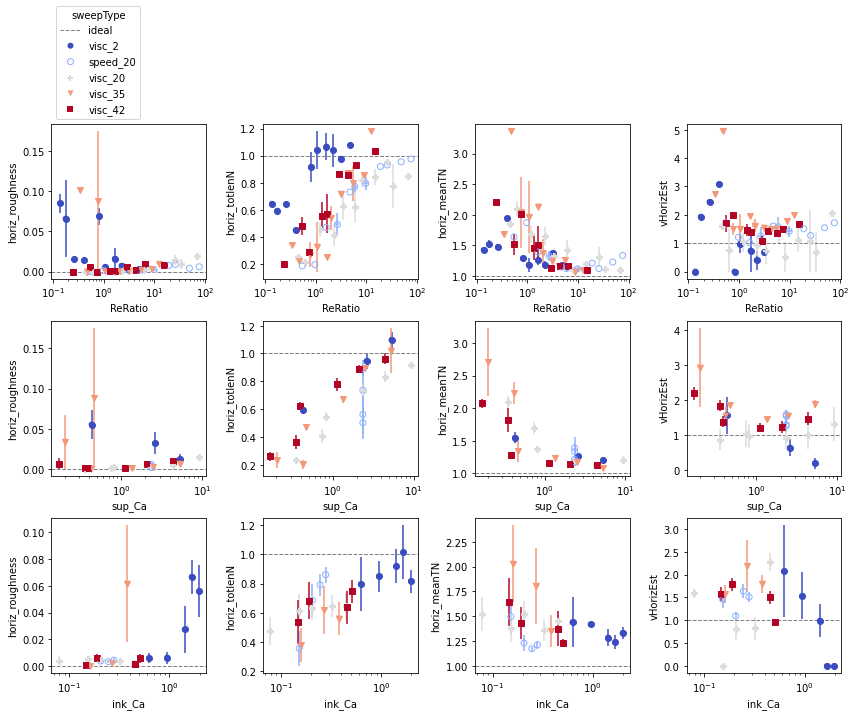

In [22]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(3,4,figsize=(12,10))
for j,s2 in enumerate(['ReRatio', 'sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['horiz_roughness', 'horiz_totlenN', 'horiz_meanTN', 'vHorizEst']):
        mp.scatterSS(ss1, s2, s, 'sweepType', logx=True, yideal=([0,1,1,1][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

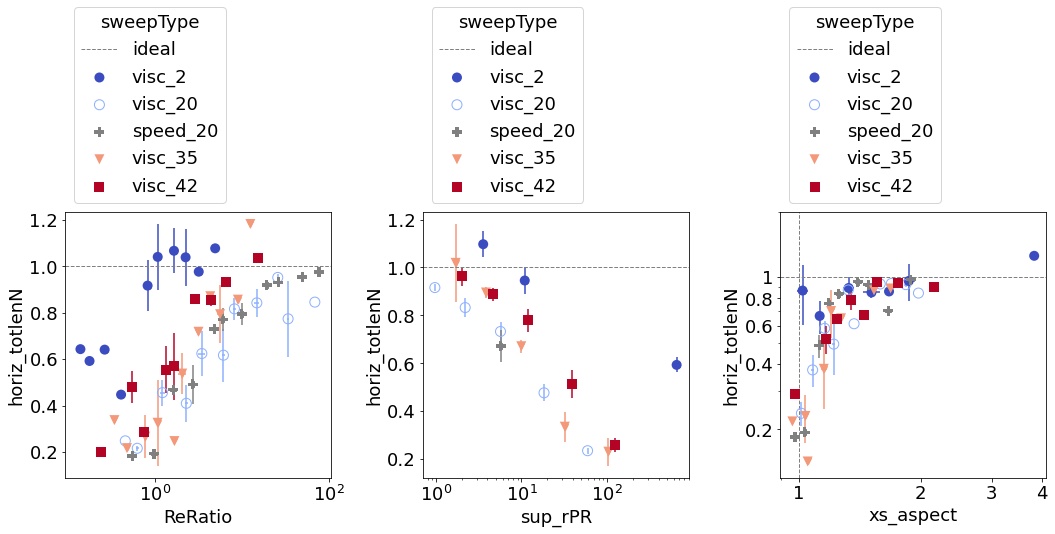

In [55]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(15, 10))

mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'sup_rPR', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'xs_aspect', 'horiz_totlenN', 'sweepType', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[2], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[2].set_xticks([1,2,3,4])
axs[2].set_xticklabels([1,2,3,4])
axs[2].set_ylim([0.12, 2])
axs[2].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[2].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
mp.setSquare(axs[2])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_totlen.svg'), bbox_inches='tight', dpi=300)

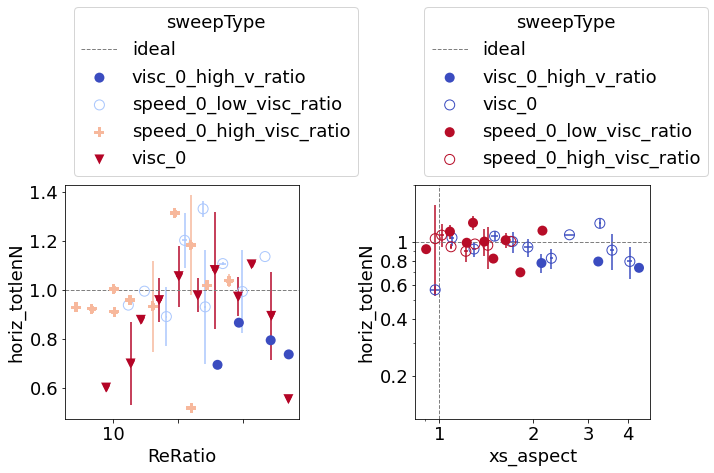

In [52]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1 = ss1[ss1.horiz_totlenN>0.5]
ss1 = ss1[ss1.horiz_totlenN_SE<0.5]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,2,figsize=(10, 10))
mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.sweepTypeSS(ss1, 'xs_aspect', 'horiz_totlenN', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[0].set_xticks([0.1, 1, 10], minor=True)
axs[0].set_xticklabels([0.1, 1, 10])
axs[1].set_xticks([1,2,3,4])
axs[1].set_xticklabels([1,2,3,4])
axs[1].set_ylim([0.12, 2])
axs[1].set_yticks([0.2, 0.4, 0.6, 0.8, 1])
axs[1].set_yticklabels([0.2, 0.4, 0.6, 0.8, 1])
mp.setSquare(axs[1])
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'ppt figures', 'horiz_totlen_0.svg'), bbox_inches='tight', dpi=300)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9c98021c8>)

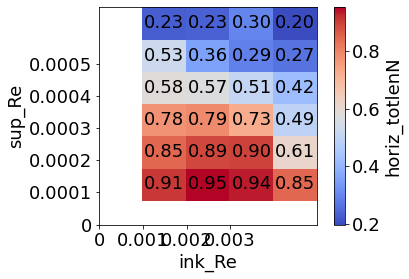

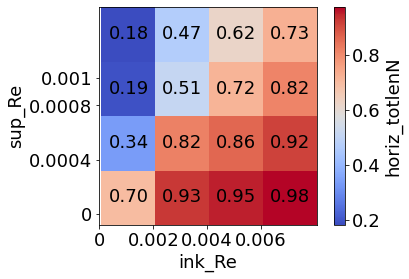

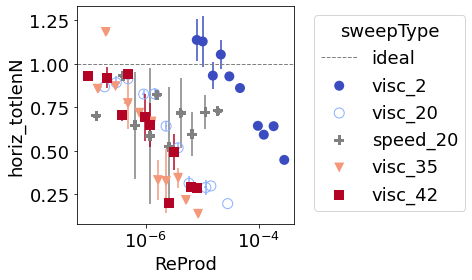

In [21]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
# fig,axs = plt.subplots(1,3,figsize=(15, 10))

# mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
# mp.scatterSS(ss1, 'ink_visc0', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
# mp.scatterSS(ss1, 'sup_visc0', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[2], fig=fig, legend=True,  markersize=100, fontsize=18)
# fig.tight_layout()
mp.colorMeshSS(ss1[ss1.sweepType=='visc_20'], 'ink_Re', 'sup_Re',  'horiz_totlenN', dy=0.01, dx=0.2)
mp.colorMeshSS(ss1[ss1.sweepType=='speed_20'], 'ink_Re', 'sup_Re',  'horiz_totlenN', dy=0.01, dx=0.2)
mp.scatterSS(ss1, 'ReProd', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), legend=True,  markersize=100, fontsize=18)

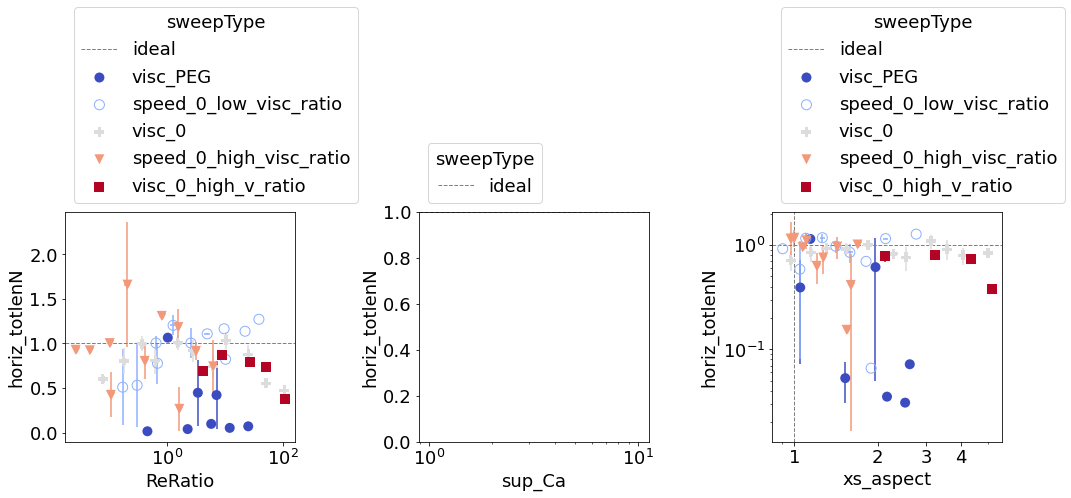

In [7]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma==0]
# ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sweepType', ascending=False)
ss1 = ss1.sort_values(by='sigma')
fig,axs = plt.subplots(1,3,figsize=(15, 10))
mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[0], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'sup_Ca', 'horiz_totlenN', 'sweepType', logx=True, yideal=(1), ax=axs[1], fig=fig, legend=True,  markersize=100, fontsize=18)
mp.scatterSS(ss1, 'xs_aspect', 'horiz_totlenN', 'sweepType', logx=True, logy=True, yideal=(1), xideal=1, ax=axs[2], fig=fig, legend=True,  markersize=100, fontsize=18)
axs[2].set_xticks([1,2,3,4])
axs[2].set_xticklabels([1,2,3,4])
fig.tight_layout()


In [5]:
vs.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'pressureCh0',
       'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant',
       'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0',
       'ink_eta0', 'ink_v', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv',
       'ink_OhInv', 'ink_rPR', 'sup_shortname', 'sup_days', 'sup_rheModifier',
       'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base',
       'sup_type', 'sup_tau0', 'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv',
       'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_rPR', 'vertDispBotN',
       'vertDispTopN', 'vertDispMidN', 'projectionN', 'projShiftN'],
      dtype='object')

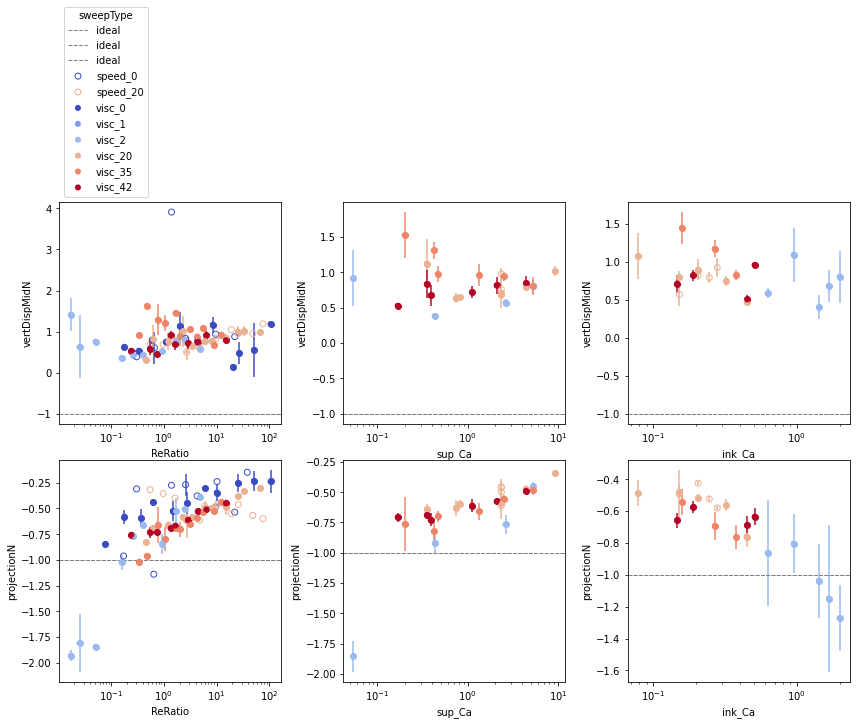

In [54]:
ss0 = vs.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sigma']=1
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'ReRatio']=0
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sup_Ca']=0
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'ink_Ca']=0
ss0 = ss0.sort_values(by='sigma')
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0['sup_Ca'] = 1/ss0['sup_CaInv']
ss0['ink_Ca'] = 1/ss0['ink_CaInv']
ss1 = ss0[ss0.sigma>0]
cmap = cm.get_cmap('coolwarm') 
fig,axs = plt.subplots(2,3,figsize=(12,10))
for i,s2 in enumerate(['ReRatio', 'sup_Ca', 'ink_Ca']):
    for j,s in enumerate(['vertDispMidN', 'projectionN']):
        for k,sweep in enumerate(['speed_0', 'speed_20', 'visc']):
            ssi = ss0
            ssi = ssi[ssi.sweepType.str.contains(sweep)]
            kwargs = {}
            kwargs['marker'] = [1,1,'o'][k]
            if sweep=='speed_0':
                kwargs['color']=cmap(0)
            elif sweep=='speed_20':
                kwargs['color']=mp.adjust_lightness(cmap(3/5),0.9)
            mp.scatterSS(ssi, s2, s, 'sweepType', logx=True, yideal=-1, ax=axs[j][i], fig=fig, legend=(i==0 and j==0), **kwargs)
fig.tight_layout()

In [77]:
ss1 = ss0.copy()
ss1 = ss1[ss1.sigma==0]
# ss1 = ss1[ss1.sweepType.str.contains('speed')]
ss1.sweepType

Series([], Name: sweepType, dtype: object)

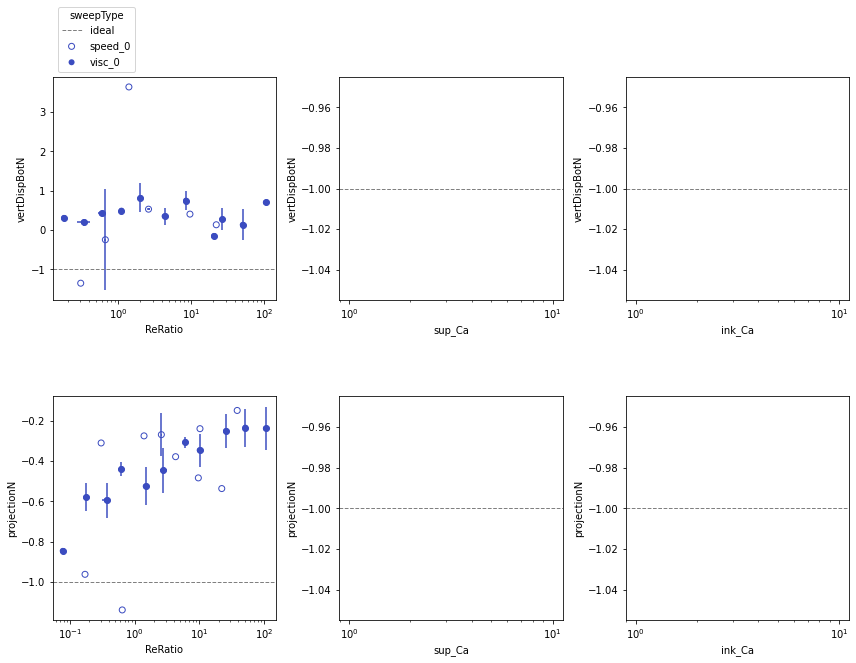

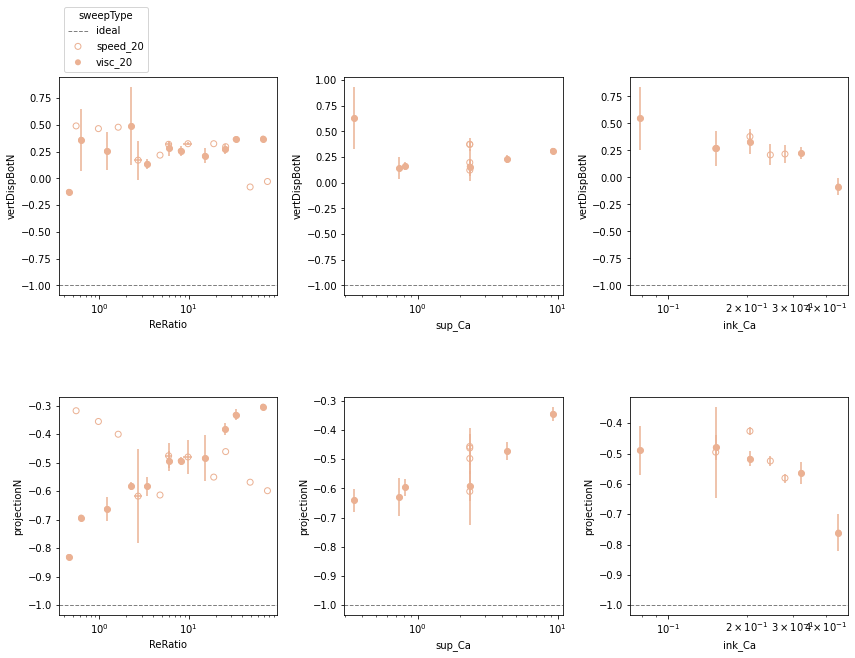

In [80]:

ss0 = vs.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sigma']=1
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'ReRatio']=0
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sup_rPRN']=0
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sweepType')
ss0['sup_Ca'] = 1/ss0['sup_CaInv']
ss0['ink_Ca'] = 1/ss0['ink_CaInv']
for sigma in [0,20]:
    ss1 = ss0.copy()
    ss1 = ss1[ss1.sigma==sigma]
    if sigma==20:
        col = mp.adjust_lightness(cmap(3/5),0.9)
    else:
        col = cmap(0)
    cmap = cm.get_cmap('coolwarm') 

    fig,axs = plt.subplots(2,3,figsize=(12,10))
    for i,s2 in enumerate(['ReRatio', 'sup_Ca', 'ink_Ca']):
        for j,s in enumerate(['vertDispBotN', 'projectionN']):
            for k,sweep in enumerate(['speed', 'visc']):
                ssi = ss1.copy()
                ssi = ssi[ssi.sweepType.str.contains(sweep)]
                kwargs = {}
                kwargs['marker'] = [1,'o'][k]
                kwargs['color']=col
                if k==0:
                    kwargs['yideal']=-1
                mp.scatterSS(ssi, s2, s, 'sweepType', logx=True, ax=axs[j][i], fig=fig, legend=(i==0 and j==0), **kwargs)
    fig.tight_layout()

In [41]:
print(ss0[ss0.sweepType=='speed_20'].sup_visc0.unique())


array([ 4.70488107, 18.83541919,  9.41373497,  6.27427386])

In [42]:
print(ss0[ss0.sweepType=='speed_20'].sup_visc0.unique())
print(ss0[ss0.sweepType=='speed_20'].sup_v.unique())
print(ss0[ss0.sweepType=='speed_20'].sup_Ca.unique())

[ 4.70488107 18.83541919  9.41373497  6.27427386]
[10.   2.5  5.   7.5]
[2.35244054 2.3544274  2.35343374 2.3528527 ]


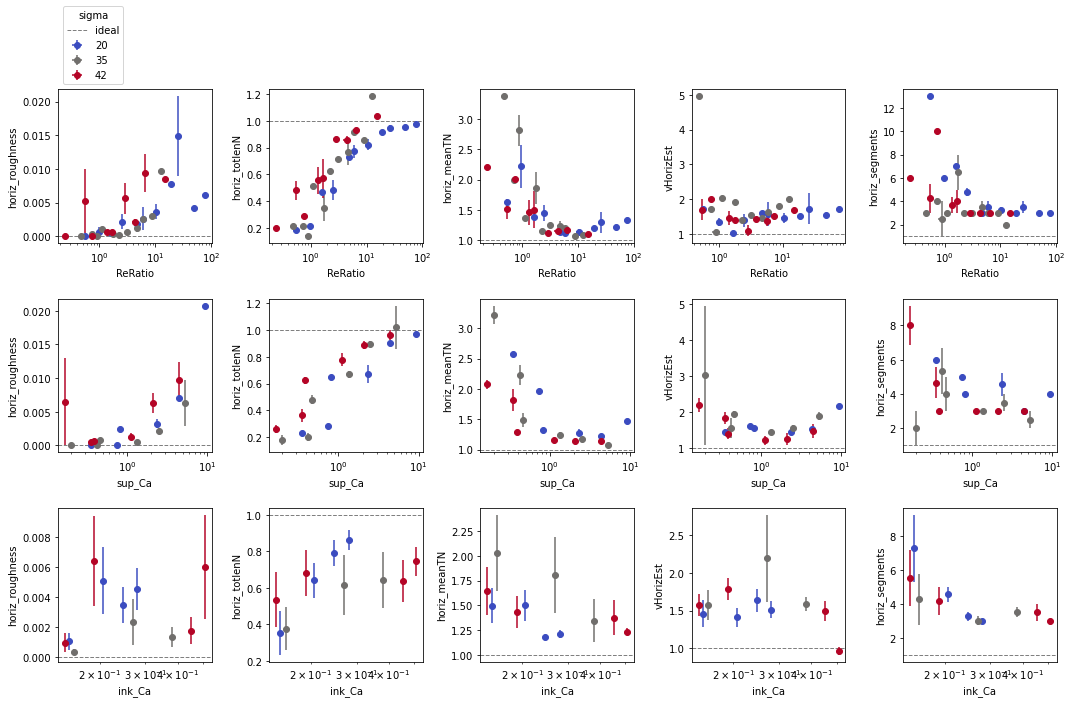

In [19]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(3,5,figsize=(15,10))
for j,s2 in enumerate(['ReRatio', 'sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['horiz_roughness', 'horiz_totlenN', 'horiz_meanTN', 'vHorizEst', 'horiz_segments']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=([0,1,1,1,1][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

In [37]:
ss1[(ss1.ReRatio<1)&(ss1.sigma==35)][['bn', 'horiz_segments']]

,bn,horiz_segments
276,I_PDMSM7.5_S_2.25_210630,3.0
267,I_PDMSM10_S_2.50_210630,4.0


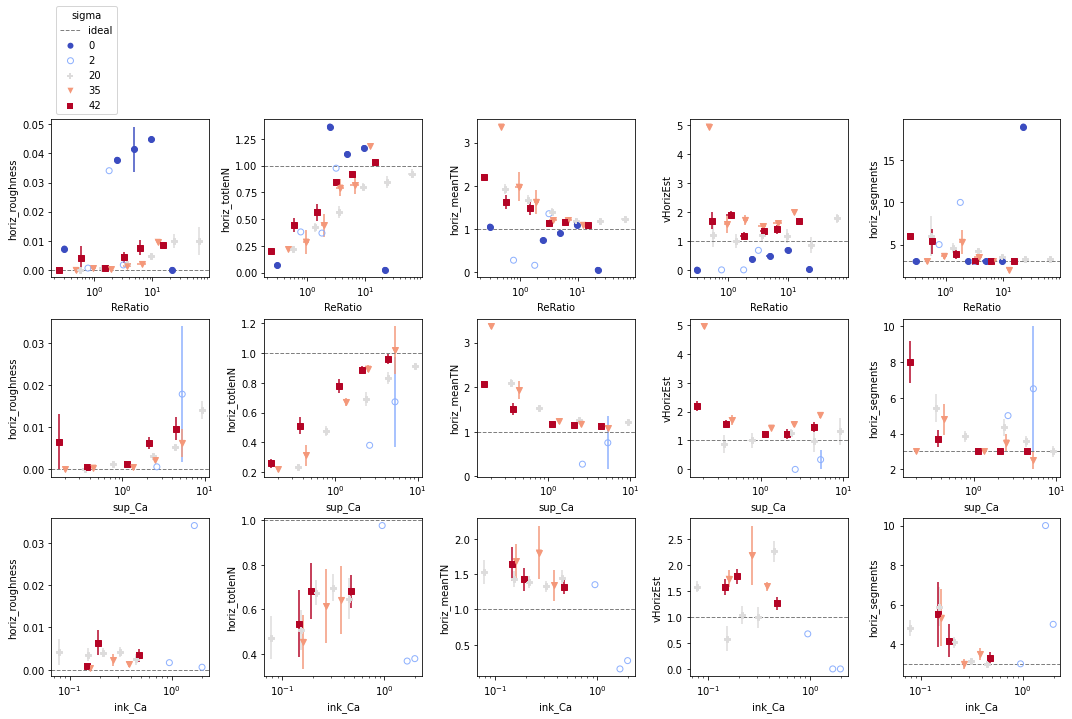

In [34]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base!="PEGDA_40"]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1[ss1.horiz_segments!=12]
ss1 = ss1[ss1.horiz_totlenN_SE<0.25]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(3,5,figsize=(15,10))
for j,s2 in enumerate(['ReRatio', 'sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['horiz_roughness', 'horiz_totlenN', 'horiz_meanTN', 'vHorizEst', 'horiz_segments']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=([0,1,1,1,3][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0), dx=0.2)
fig.tight_layout()

In [40]:
ssi = ss[(ss.horiz_totlenN<0.5)&(ss.ReRatio>10)]
ssi[['bn', 'horiz_totlenN']]

,bn,horiz_totlenN
5,I_2.25_S_4.00_210727,0.472570
142,I_M4_S_3.00_210921,0.493027
369,I_PEG10_S_4.00_210630,0.074012
382,I_PEG7.5_S_3.50_210630,0.030841
383,I_PEG7.5_S_4.00_210630,0.069958


C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


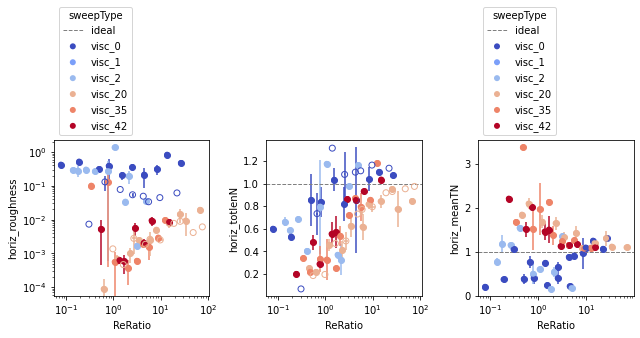

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [41]:
ss0 = ss.copy()
ss0 = ss0[ss0.bn!='I_2.25_S_4.00_210727'] # bubbles, bad segmentation
ss0 = ss0[ss0.ink_days==1]
ss0 = ss0[ss0.horiz_roughness_SE<0.5]
ss0 = ss0[ss0.horiz_totlenN_SE<0.25]
ss0['sup_Ca']=1/ss0['sup_CaInv']
ss0['sup_rPRN'] = 2*ss0['sup_rPR']/ss1['dEst']
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sigma']=1
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'ReRatio']=0
ss0.loc[(ss0.ink_base == 'PEGDA_40'),'sup_rPRN']=0
ss0['sweepType']=['speed_'+str(i['sigma']) if ('I_2.75_S_2.75_VI' in i['bn'] or 'I_M6_S_3.00_VI' in i['bn']) else 'visc_'+str(i['sigma']) for j,i in ss0.iterrows()]
ss0 = ss0.sort_values(by='sigma')
# ss0 = ss0[ss0.ink_type!="PEGDA_40"]
(ss0[ss0.sigma==0]).sup_Ca = [100000 for i in range(len(ss0[ss0.sigma==0]))]
ssspeed0 = ss0[ss0.sweepType=='speed_0']
ssspeed20 = ss0[ss0.sweepType=='speed_20']
cmap = cm.get_cmap('coolwarm') 
ssvisc = ss0[ss0.sweepType.str.contains('visc')]
fig,axs = plt.subplots(1,3,figsize=(9,8))
color20 = mp.adjust_lightness(cmap(3/5),0.9)
mp.scatterSS(ssvisc, 'ReRatio', 'horiz_roughness', 'sweepType', logx=True, logy=True, gradColor=0, yideal=0, ax=axs[0], units=u, legend=True, marker='o')
mp.scatterSS(ssspeed0, 'ReRatio', 'horiz_roughness', 'sweepType', logx=True, logy=True, gradColor=0, ax=axs[0], units=u, legend=False, marker=1, color=cmap(0))
mp.scatterSS(ssspeed20, 'ReRatio', 'horiz_roughness', 'sweepType', logx=True, logy=True, gradColor=0, ax=axs[0], units=u, legend=False, marker=1, color=color20)
mp.scatterSS(ssvisc, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[1], units=u, legend=False, marker='o')
mp.scatterSS(ssspeed0, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[1], units=u, legend=False, marker=1, color=cmap(0))
mp.scatterSS(ssspeed20, 'ReRatio', 'horiz_totlenN', 'sweepType', logx=True, logy=False, gradColor=0, ax=axs[1], units=u, legend=False, marker=1, color=color20)
mp.scatterSS(ssvisc, 'ReRatio', 'horiz_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[2], units=u, legend=True, marker='o')
mp.scatterSS(ssspeed0, 'ReRatio', 'horiz_meanTN', 'sweepType', logx=True, logy=False, gradColor=0, yideal=1, ax=axs[2], units=u, legend=False, marker='o', color=cmap(0))
fig.tight_layout()
# fig.savefig(os.path.join(cfg.path.fig, 'figures', 'horiz_metrics.svg'), bbox_inches='tight', dpi=300)

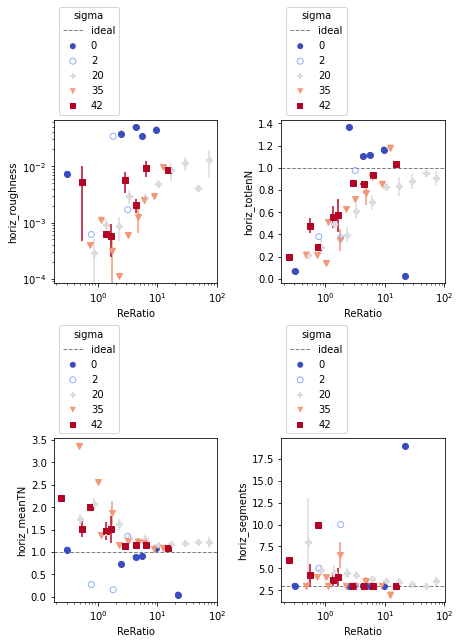

In [22]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base!="PEGDA_40"]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1[ss1.horiz_segments!=12]
ss1 = ss1[ss1.horiz_totlenN_SE<0.25]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6.5,9))
mp.scatterSS(ss1, 'ReRatio', 'horiz_roughness', 'sigma', logx=True, logy=True, yideal=(0), ax=axs[0][0], fig=fig, units=u)
mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sigma', logx=True, yideal=(1), ax=axs[0][1], fig=fig, units=u)
mp.scatterSS(ss1, 'ReRatio', 'horiz_meanTN', 'sigma', logx=True, yideal=(1), ax=axs[1][0], fig=fig, units=u)
mp.scatterSS(ss1, 'ReRatio', 'horiz_segments', 'sigma', logx=True, yideal=(3), ax=axs[1][1], fig=fig, units=u)
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'horiz_measures.svg'), bbox_inches='tight', dpi=300)

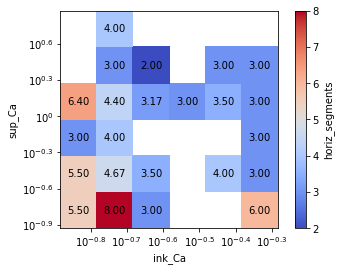

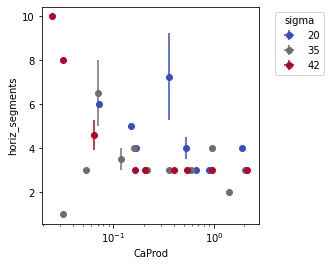

In [23]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
ss1['CaProd'] = ss1['sup_Ca']*ss1['ink_Ca']
mp.colorMeshSS(ss1, 'ink_Ca', 'sup_Ca', 'horiz_segments', logx=True,logy=True, dx=0.2, dy=0.2)
mp.scatterSS(ss1, 'CaProd',  'horiz_segments', 'sigma', logx=True,logy=False)
fig.tight_layout()

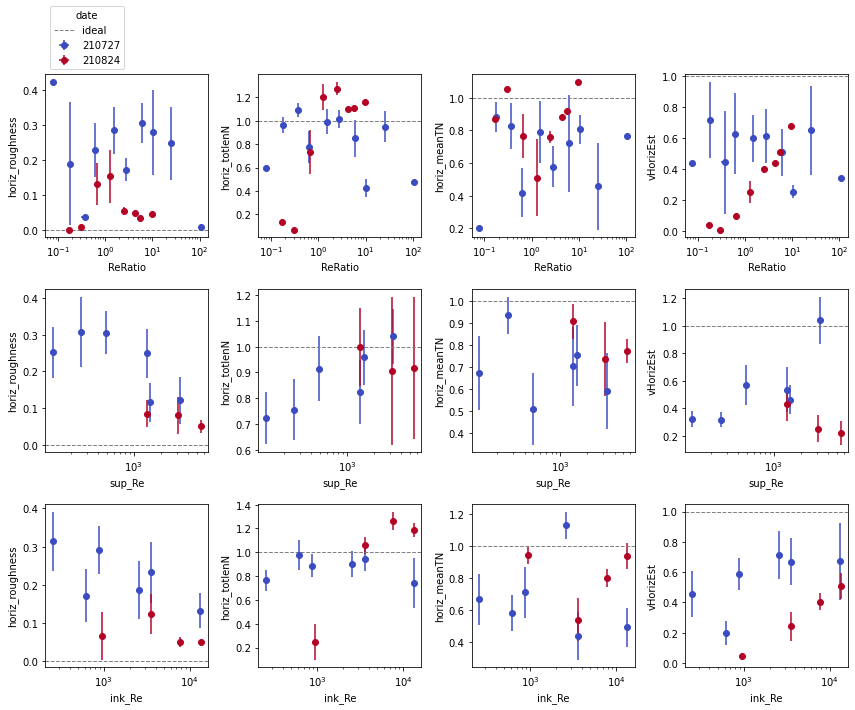

In [12]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1  = ss1[ss1.ink_days==1]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.horiz_meanTN<4]
fig,axs = plt.subplots(3,4,figsize=(12,10))
for j,s2 in enumerate(['ReRatio', 'sup_Re', 'ink_Re']):
    for i,s in enumerate(['horiz_roughness', 'horiz_totlenN', 'horiz_meanTN', 'vHorizEst']):
        mp.scatterSS(ss1, s2, s, 'date', logx=True, yideal=([0,1,1,1][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b8bf5da988>)

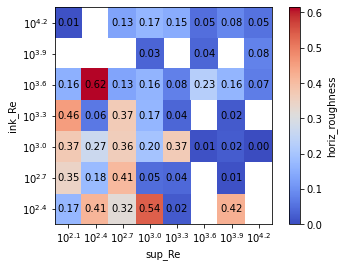

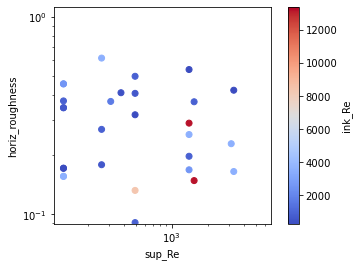

In [15]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1  = ss1[ss1.ink_days==1]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.horiz_meanTN<4]
mp.colorMeshSS(ss1, 'sup_Re', 'ink_Re', 'horiz_roughness', logx=True, logy=True)
mp.scatterSS(ss1, 'sup_Re',  'horiz_roughness','ink_Re', logx=True, logy=True, gradColor=True, dx=0, dy=0)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b8c0345948>)

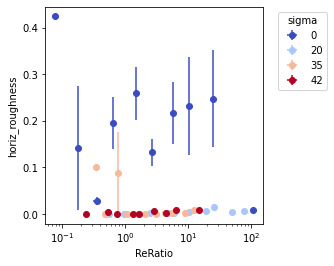

In [17]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1  = ss1[ss1.ink_days==1]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.horiz_meanTN<4]
mp.scatterSS(ss1, 'ReRatio',  'horiz_roughness','sigma', logx=True, logy=False, gradColor=False)